For a Bachelor Project that we have by end of 5th semester in Germany, Me and my group decided to take a Topic, successful TED Talks.
Hence, We desinged a study to find out factors that might be influced to TED talk's scueess.

A standard of successful TED talk is how many views TED veidoe has got in Youtube.
And each factors are analyzied by ourselves in a subjective and objective way according to thier character.
At the end we came out with 20 different factors in 8 categories.

We decided to apply Pearson R, ANOVA and linear regression according to if the factor is Ordinal or Nominal.

This note will be only about Ordinal factors.

In [7]:
from google.colab import drive
ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/Successful Ted talks/DATA'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/Successful Ted talks/DATA


In [ ]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/Successful Ted talks/DATA


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Ted_Ordinal =  pd.read_excel('/content/drive/My Drive/Colab Notebooks/Successful Ted talks/DATA/data_set_final.xlsx')

Firstly, I connected my note to my onedrive, so that i can import data easily.
In addition, importing the packages i might need and the data set i need.

In [ ]:
Ted_Ordinal.head()

,number,views,date,speaker,url,Unnamed: 5,,sort,duration,topic,reason,relevance,simplicity,humour,storytelling,speaker_p,gender,s_speed,speed,speed_change,visual,outfit,gesture,movement,expression,grade
0,261,1041,2019-07-01 00:00:00,Julia Espinosa,https://www.ted.com/talks/julia_espinosa_the_s...,NaN,NaN,tedx,17,entertainment,explanation,2,2,3,personal,1,female,3,165.0,1,18,informal,3,2,2.0,2
1,45,3184,2019-11-01 00:00:00,Arjan Dwarshuis,https://www.ted.com/talks/arjan_dwarshuis_what...,NaN,NaN,tedx,13,science,solution,2,4,4,personal,3,male,3,155.0,0,4,informal,3,4,3.0,3
2,63,2340,2019-11-01 00:00:00,Lara Maiklem,https://www.ted.com/talks/lara_maiklem_trash_o...,NaN,NaN,tedx,13,entertainment,explanation,1,3,1,no,2,female,3,180.0,1,0,informal,2,4,3.0,2
3,274,3600,2019-06-01 00:00:00,Drew Silverstein,https://www.ted.com/talks/drew_silverstein_how...,NaN,NaN,tedx,13,entertainment,entertainment,1,4,1,no,1,male,3,134.0,0,7,formal,3,2,2.0,3
4,290,4030,2019-06-01 00:00:00,Truls Nord,https://www.ted.com/talks/truls_nord_tactile_p...,NaN,NaN,tedx,13,entertainment,explanation,1,3,0,no,1,male,3,119.0,1,0,formal,3,4,2.0,2


In [ ]:
Ted_Ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   number        193 non-null    int64  
 1   views         193 non-null    int64  
 2   date          193 non-null    object 
 3   speaker       193 non-null    object 
 4   url           193 non-null    object 
 5   Unnamed: 5    0 non-null      float64
 6                 1 non-null      object 
 7   sort          193 non-null    object 
 8   duration      193 non-null    int64  
 9   topic         193 non-null    object 
 10  reason        193 non-null    object 
 11  relevance     193 non-null    int64  
 12  simplicity    193 non-null    int64  
 13  humour        193 non-null    int64  
 14  storytelling  193 non-null    object 
 15  speaker_p     193 non-null    int64  
 16  gender        193 non-null    object 
 17  s_speed       193 non-null    int64  
 18  speed         193 non-null    

head to check columns name and index
info to check if NAN exsits in the data.

I will start checking out Pearson R between views(success) and ordinal factors, so that i can figure out if i should put this in a Linear regression or not.
I will put hearmap you to understand better :)


Strength of Association	Positive	Negative
Small                	.1 to .3	-0.1 to -0.3
Medium	              .3 to .5	-0.3 to -0.5
Large                 	.5 to 1.0	-0.5 to -1.0
   from : https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php

In [ ]:
df_EX = pd.DataFrame(Ted_Ordinal[['views', 'duration']])
corr_ex = df_EX.corr(method = 'pearson')
display(corr_ex)

,views,duration
views,1.000000,0.240269
duration,0.240269,1.000000


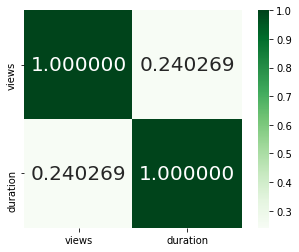

In [ ]:
Ex_heatmap = sns.heatmap(corr_ex, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '2f', square = True, cmap = 'Greens')

Duration is one of our exogenous factor.
It shows a small corrlation.
Thurs, we can test liner regression.

In [ ]:
df_topic = pd.DataFrame(Ted_Ordinal[['views', 'relevance']])
corr_topic = df_topic.corr(method = 'pearson')
display(corr_topic)

,views,relevance
views,1.0000,0.6297
relevance,0.6297,1.0000


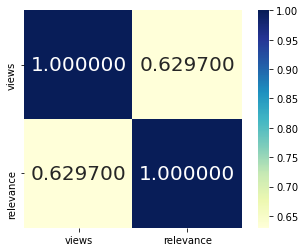

In [ ]:
topic_heatmap = sns.heatmap(corr_topic, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '2f', square = True, cmap = 'YlGnBu')

Relevance is one of our Topic factor.
It shows a significant corrlation.
so -> test liner regression.

In [ ]:
df_speaker = pd.DataFrame(Ted_Ordinal[['views', 'speaker_p']])
corr_speaker = df_speaker.corr(method = 'pearson')
display(corr_speaker)

,views,speaker_p
views,1.000000,0.625412
speaker_p,0.625412,1.000000


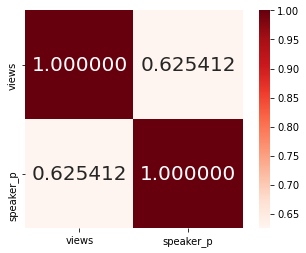

In [ ]:
speaker_heatmap = sns.heatmap(corr_speaker, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '2f', square = True, cmap = 'Reds')

Speaker's popularity is in our speaker section.
And it represents a strong positive correlation.
-> testing linear regression

In [ ]:
df_vocals = pd.DataFrame(Ted_Ordinal[['views', 's_speed', 'speed']])
corr_vocals = df_vocals.corr(method = 'pearson')
display(corr_vocals)

,views,s_speed,speed
views,1.000000,-0.000831,0.030317
s_speed,-0.000831,1.000000,0.548451
speed,0.030317,0.548451,1.000000


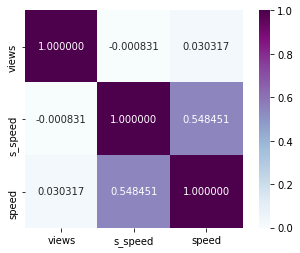

In [ ]:
vocals_heatmap = sns.heatmap(corr_vocals, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '2f', square = True, cmap = 'BuPu')

In our Vocal category, we have Speed and subjective speed as ordinal factors.
Unfortunately, both factors don't have significant correlation with Views (success).
-> no linear regression test needed.

In [ ]:
df_Body = pd.DataFrame(Ted_Ordinal[['views', 'gesture', 'movement', 'expression']])
corr_Body = df_Body.corr(method = 'pearson')
display(corr_Body)

,views,gesture,movement,expression
views,1.000000,-0.116525,-0.046507,-0.119744
gesture,-0.116525,1.000000,0.325519,0.249965
movement,-0.046507,0.325519,1.000000,0.315002
expression,-0.119744,0.249965,0.315002,1.000000


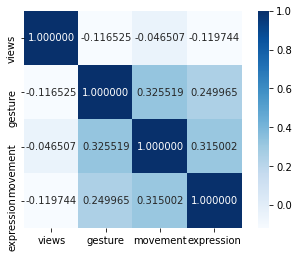

In [ ]:
Body_heatmap = sns.heatmap(corr_Body, cbar = True, annot = True, annot_kws={'size' : 10}, fmt = '2f', square = True, cmap = 'Blues')

Non of ordinal factor in Body language category have a significant correlation.
-> No linear regression.


In [ ]:
df_visual = pd.DataFrame(Ted_Ordinal[['views', 'visual']])
corr_visual = df_visual.corr(method = 'pearson')
display(corr_visual)

,views,visual
views,1.000000,-0.067988
visual,-0.067988,1.000000


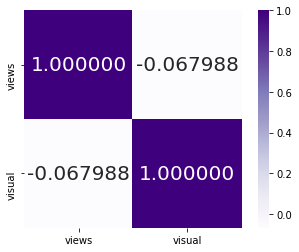

In [ ]:
visual_heatmap = sns.heatmap(corr_visual, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '2f', square = True, cmap = 'Purples')

It comes same with Visuality.
-> no linear regression

In [ ]:
df_Character = pd.DataFrame(Ted_Ordinal[['views', 'simplicity', 'humour']])
corr_character = df_Character.corr(method = 'pearson')
display(corr_character)

,views,simplicity,humour
views,1.000000,-0.485650,0.147325
simplicity,-0.485650,1.000000,-0.076086
humour,0.147325,-0.076086,1.000000


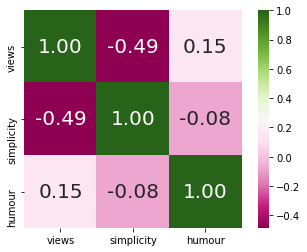

In [ ]:
Character_heatmap = sns.heatmap(corr_character, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'PiYG')

Among factors of Charater of speech, Simplicitiy has a significant negavtive correlation and humour has a slight one.
So, we will test linear regression.

In [ ]:
df_grade = pd.DataFrame(Ted_Ordinal[['views', 'grade']])
corr_grade = df_grade.corr(method = 'pearson')
display(corr_grade)

,views,grade
views,1.000000,0.616433
grade,0.616433,1.000000


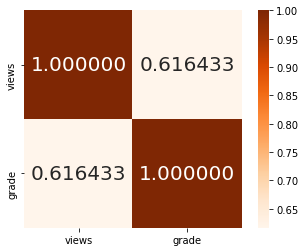

In [ ]:
grade_heatmap = sns.heatmap(corr_grade, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '2f', square = True, cmap = 'Oranges')

Finally, we have subjective grade from us, which represents apprisals of people.
It appears a strong positive correlation.
-> linear gresttion.

To see, if we can put the factors together in multiple linear regression, we should check if they(independent variables) have multicollinearity.

In [ ]:
df_Ted = pd.DataFrame(Ted_Ordinal[['duration','relevance', 'speaker_p', 'simplicity','humour', 'grade']])

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_Ted. values, i) for i in range(df_Ted.shape[1])]
vif["features"] = df_Ted.columns
vif

,VIF Factor,features
0,11.324577,duration
1,17.492139,relevance
2,12.455544,speaker_p
3,4.417360,simplicity
4,1.663244,humour
5,22.844269,grade


If VIF value is above 10, it can be assumed that independent varaibles have multicollinearity.
Thus, i will test linear regresssion seperately according to each category.

Linear Regression.

In [ ]:
EX_OLS = ols('views ~ duration', data= Ted_Ordinal).fit()
EX_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     11.70
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           0.000764
Time:                        07:03:42   Log-Likelihood:                -3080.2
No. Observations:                 193   AIC:                             6164.
Df Residuals:                     191   BIC:                             6171.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.563e+04   5.53e+05     -0.046      0.963   -1.12e+06    1.07e+06
duration    1.472e+05    4.3e+04      3.421      0.001    6.23e+04    2.32e+05
==============================================================================
Omnibus:                       92.323   Durbin-Watson:                   0.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              402.114
Skew:                           1.869   Prob(JB):                     4.81e-88
Kurtosis:                       9.002   Cond. No.                         47.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Y = (-2.565e+04)+(1.472e+05)X.


P < 0.05

F(11.70) > F-crtical value (3.90)

T(3.421) > T-critical value(1.96)

R = 5%

147200 views increase every 1 minute longer Ted videos. However, R-square and adjusted R-square are very little. 
Therefore, the variance in success is not explained by duration.

In [ ]:
Topic_OLS = ols('views ~ relevance', data=Ted_Ordinal).fit()
Topic_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     125.5
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           1.03e-22
Time:                        07:04:16   Log-Likelihood:                -3037.2
No. Observations:                 193   AIC:                             6078.
Df Residuals:                     191   BIC:                             6085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.283e+06      3e+05     -4.282      0.000   -1.87e+06   -6.92e+05
relevance   8.829e+05   7.88e+04     11.203      0.000    7.27e+05    1.04e+06
==============================================================================
Omnibus:                      130.359   Durbin-Watson:                   0.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1218.964
Skew:                           2.471   Prob(JB):                    2.02e-265
Kurtosis:                      14.276   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Y= (-1.283e+06)+(8.829e+05)X

p < 0.05

F(125.5) > F-critic-value (3.90)

T(11.203) > T-critical value (1.96)

R = 39.7%

1 higher point of Relevance brings 882900 more views

In [ ]:
Speaker_OLS = ols('views ~ speaker_p', data=Ted_Ordinal).fit()
Speaker_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     122.7
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           2.41e-22
Time:                        07:04:27   Log-Likelihood:                -3038.0
No. Observations:                 193   AIC:                             6080.
Df Residuals:                     191   BIC:                             6087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.331e+05   2.66e+05     -3.132      0.002   -1.36e+06   -3.08e+05
speaker_p   9.518e+05   8.59e+04     11.077      0.000    7.82e+05    1.12e+06
==============================================================================
Omnibus:                      151.626   Durbin-Watson:                   0.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1942.834
Skew:                           2.904   Prob(JB):                         0.00
Kurtosis:                      17.418   Cond. No.                         7.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Y= (-8.331e+05)+(9.518e+05)X

P < 0.05

F(122.7) > F-Critic(3.90)

T(11.077) > T-Critic(1.96)

R = 39.1%

Ted talk gains 9518000 more views, if the speaker's popluarity has one point more

In [ ]:
Character_OLS = ols('views ~ simplicity+humour', data = Ted_Ordinal).fit()
Character_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     31.35
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           1.72e-12
Time:                        07:07:22   Log-Likelihood:                -3058.4
No. Observations:                 193   AIC:                             6123.
Df Residuals:                     190   BIC:                             6133.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.286e+06   3.97e+05     10.796      0.000     3.5e+06    5.07e+06
simplicity -1.007e+06   1.33e+05     -7.564      0.000   -1.27e+06   -7.45e+05
humour      3.969e+04   2.26e+04      1.760      0.080   -4802.013    8.42e+04
==============================================================================
Omnibus:                      131.157   Durbin-Watson:                   0.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1124.911
Skew:                           2.536   Prob(JB):                    5.35e-245
Kurtosis:                      13.685   Cond. No.                         23.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Y= (4.286e+06)+(-1.007e+06)X1+(3.969e+04)X2.

P < 0.05


F(31.25) > F-critical (3.06)

Homour P > 0.05

Simplicity P < 0.05
T(7.564) > T- critical(1.96)

R = 24.8%

If simplicity decrease one point, it causes 1007000 more views


In [ ]:
Grade_OLS = ols("views ~ grade", data = Ted_Ordinal).fit()
Grade_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     117.1
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           1.39e-21
Time:                        07:08:07   Log-Likelihood:                -3039.8
No. Observations:                 193   AIC:                             6084.
Df Residuals:                     191   BIC:                             6090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.249e+06   3.93e+05     -5.723      0.000   -3.02e+06   -1.47e+06
grade       1.075e+06   9.94e+04     10.819      0.000    8.79e+05    1.27e+06
==============================================================================
Omnibus:                      125.121   Durbin-Watson:                   0.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1068.460
Skew:                           2.376   Prob(JB):                    9.70e-233
Kurtosis:                      13.501   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Y= (-2.249e+06)+(1.075e+06)X. 

P < 0.05

F(117.1) > F critical (3.90)

T(10.819) > T critical (1.96)

R = 38%

Ted talk gains 1075000 more views, if the grade has one point more. 